
# Equations of Motion

Notebook to test how to use Sympy for equations of motion.

In [5]:
import sympy as sp
import sympy.physics.mechanics as me 
import numpy as np
from sympy.utilities.iterables import flatten

sp.init_printing()

In [6]:
u,v,w = sp.symbols(['u', 'v', 'w'])
t = sp.symbols('t')

In [7]:
u = sp.Function('u')(t)
v = sp.Function('v')(t)
w = sp.Function('w')(t)

In [8]:
u

u(t)

In [9]:
V = sp.Matrix([u, v, w])

In [10]:
V

⎡u(t)⎤
⎢    ⎥
⎢v(t)⎥
⎢    ⎥
⎣w(t)⎦

In [11]:
sp.diff(V, t)

⎡d       ⎤
⎢──(u(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(v(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(w(t))⎥
⎣dt      ⎦

# First simple example of point mass
Point mass m attached to string swinging around (0,0,0) with angular velocity $\omega$

1. Calculage initial conditions
2. Calculate $\vec{F}$  
3. Integrate to get the positions

### Initial conditions
Particle starts at $(1, 0, 0)$ with velocity $(0,v,0)$ and spins in the $xy$ plane

In [12]:
v_linear, mass, r0  = sp.symbols(['v', 'm', 'r_0'])
t = sp.symbols('t')

In [13]:
w, theta = sp.symbols(['omega', 'theta'])

In [14]:
w = v_linear/r0

In [15]:
w

v 
──
r₀

In [16]:
theta = w*t

In [17]:
theta

t⋅v
───
 r₀

In [18]:
f = mass*w**2*r0

In [19]:
f

   2
m⋅v 
────
 r₀ 

In [20]:
F = sp.Matrix([-f*sp.cos(theta), -f*sp.sin(theta), 0*theta])
F

⎡    2    ⎛t⋅v⎞ ⎤
⎢-m⋅v ⋅cos⎜───⎟ ⎥
⎢         ⎝ r₀⎠ ⎥
⎢───────────────⎥
⎢       r₀      ⎥
⎢               ⎥
⎢    2    ⎛t⋅v⎞ ⎥
⎢-m⋅v ⋅sin⎜───⎟ ⎥
⎢         ⎝ r₀⎠ ⎥
⎢───────────────⎥
⎢       r₀      ⎥
⎢               ⎥
⎣       0       ⎦

In [21]:
F.subs({theta:w*t}).subs({ w:v_linear/r0 })

⎡    2    ⎛t⋅v⎞ ⎤
⎢-m⋅v ⋅cos⎜───⎟ ⎥
⎢         ⎝ r₀⎠ ⎥
⎢───────────────⎥
⎢       r₀      ⎥
⎢               ⎥
⎢    2    ⎛t⋅v⎞ ⎥
⎢-m⋅v ⋅sin⎜───⎟ ⎥
⎢         ⎝ r₀⎠ ⎥
⎢───────────────⎥
⎢       r₀      ⎥
⎢               ⎥
⎣       0       ⎦

In [22]:
F.subs({theta:w*t}).subs({w:1, r0:1, mass:1})[0]

-v⋅cos(t)

In [23]:
F.subs({theta:w*t}).subs({w:1, r0:1, mass:1})[1]

-v⋅sin(t)

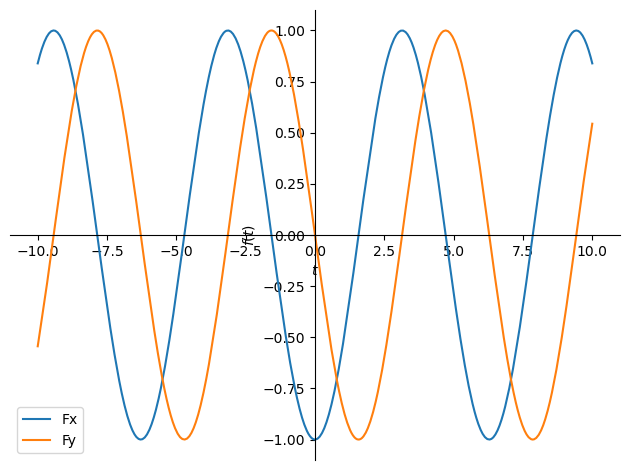

In [24]:
from sympy.plotting import plot
t = sp.symbols('t')
p1 = plot(F.subs({theta:w*t}).subs({w:1, r0:1, mass:1, v_linear:1})[0], show=False, label='Fx')
p2 = plot(F.subs({theta:w*t}).subs({w:1, r0:1, mass:1, v_linear:1})[1], show=False, label='Fy')
p1.extend(p2)
p1.legend = True
p1.show()

In [25]:
F

⎡    2    ⎛t⋅v⎞ ⎤
⎢-m⋅v ⋅cos⎜───⎟ ⎥
⎢         ⎝ r₀⎠ ⎥
⎢───────────────⎥
⎢       r₀      ⎥
⎢               ⎥
⎢    2    ⎛t⋅v⎞ ⎥
⎢-m⋅v ⋅sin⎜───⎟ ⎥
⎢         ⎝ r₀⎠ ⎥
⎢───────────────⎥
⎢       r₀      ⎥
⎢               ⎥
⎣       0       ⎦

In [26]:
xd,yd,zd = sp.symbols('xd, yd, zd')
x_dot = sp.Matrix([xd,yd,zd])

In [27]:
sp.solve(mass*x_dot-F, x_dot)

⎧      2    ⎛t⋅v⎞         2    ⎛t⋅v⎞        ⎫
⎪    -v ⋅cos⎜───⎟       -v ⋅sin⎜───⎟        ⎪
⎨           ⎝ r₀⎠              ⎝ r₀⎠        ⎬
⎪xd: ─────────────, yd: ─────────────, zd: 0⎪
⎩          r₀                 r₀            ⎭

# States


In [28]:
from sympy.physics.mechanics import dynamicsymbols

$\vec{X}$   
$\vec{V}$   
$\vec{\Theta}$   
$\vec{\Omega}$   


In [29]:
x, y, z = dynamicsymbols(['x','y','z'])
X = sp.Matrix([x, y, z])
X

⎡x(t)⎤
⎢    ⎥
⎢y(t)⎥
⎢    ⎥
⎣z(t)⎦

In [30]:
V = sp.diff(X,t)
V

⎡d       ⎤
⎢──(x(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(y(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(z(t))⎥
⎣dt      ⎦

In [31]:
u, v, w = dynamicsymbols(['u','v','w'])
V = sp.Matrix([u, v, w ])
V

⎡u(t)⎤
⎢    ⎥
⎢v(t)⎥
⎢    ⎥
⎣w(t)⎦

In [32]:
theta_x, theta_y, theta_z = dynamicsymbols(['theta_x','theta_y','theta_z'])
theta = sp.Matrix([theta_x, theta_y, theta_z])
theta

⎡θₓ(t) ⎤
⎢      ⎥
⎢θ_y(t)⎥
⎢      ⎥
⎣θ_z(t)⎦

In [33]:
omega_x, omega_y, omega_z = dynamicsymbols(['omega_x','omega_y','omega_z'])
omega = sp.Matrix([omega_x, omega_y, omega_z])
omega

⎡ωₓ(t) ⎤
⎢      ⎥
⎢ω_y(t)⎥
⎢      ⎥
⎣ω_z(t)⎦

In [34]:
fx, fy, fz = sp.symbols(['f_x','f_y','f_z'])
F = sp.Matrix([fx, fy, fz])
F

⎡fₓ ⎤
⎢   ⎥
⎢f_y⎥
⎢   ⎥
⎣f_z⎦

In [35]:
sp.diff(V,t)

⎡d       ⎤
⎢──(u(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(v(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(w(t))⎥
⎣dt      ⎦

In [36]:
V

⎡u(t)⎤
⎢    ⎥
⎢v(t)⎥
⎢    ⎥
⎣w(t)⎦

In [37]:
omega.cross(V)

⎡ω_y(t)⋅w(t) - ω_z(t)⋅v(t)⎤
⎢                         ⎥
⎢-ωₓ(t)⋅w(t) + ω_z(t)⋅u(t)⎥
⎢                         ⎥
⎣ωₓ(t)⋅v(t) - ω_y(t)⋅u(t) ⎦

In [38]:
sp.solve(mass*sp.diff(V,t)+mass*omega.cross(V)-F,  sp.diff(V,t))

⎧d         fₓ                              d         f_y                      
⎨──(u(t)): ── - ω_y(t)⋅w(t) + ω_z(t)⋅v(t), ──(v(t)): ─── + ωₓ(t)⋅w(t) - ω_z(t)
⎩dt        m                               dt         m                       

       d         f_z                           ⎫
⋅u(t), ──(w(t)): ─── - ωₓ(t)⋅v(t) + ω_y(t)⋅u(t)⎬
       dt         m                            ⎭

In [39]:
mass

m

In [40]:
(F+mass*omega.cross(V))/mass

⎡fₓ + m⋅(ω_y(t)⋅w(t) - ω_z(t)⋅v(t)) ⎤
⎢────────────────────────────────── ⎥
⎢                m                  ⎥
⎢                                   ⎥
⎢f_y + m⋅(-ωₓ(t)⋅w(t) + ω_z(t)⋅u(t))⎥
⎢───────────────────────────────────⎥
⎢                 m                 ⎥
⎢                                   ⎥
⎢f_z + m⋅(ωₓ(t)⋅v(t) - ω_y(t)⋅u(t)) ⎥
⎢────────────────────────────────── ⎥
⎣                m                  ⎦